In [1]:
import numpy as np

import jiant.utils.python.io as py_io
import matplotlib.pyplot as plt

In [2]:
pparam = dict(xlabel='', ylabel='Evaluation Acc (\%)')

task_names = [
  "lex-ent", "transit", "hyper", "hypo", "ner",
  "vbn", "vbc", "syn-alt", "syn-var",
  "bool", "cond", "cont", "comp",
  "negat", "quant", "monot",
  "kg-rel", "coref", "senti", "ctx-align",
  "puns", "sprl", "ent-tree", "analytic",
  "temp", "spat", "counter", "defeas",
  "social", "physic", "swag", "cosmo",
  "drop", "ester","logi", "control"
]

lexical_tasks = ["lexical-entail", "transitive", "hypernymy", "hyponymy"]
syntactic_tasks = ["verbnet", "verbcorner", "synt-alt", "synt-var"]
semantic_tasks = ["kg-relation",  "sentiment", "puns",
                  "context-align", "coreference", "sprl"]
logical_taasks = ["boolean", "comparative", "conditional", "counting",
                  "negation", "quantifier", "monotonicity"]
commonsense_tasks = ["cosmoqa", "socialqa", "physicalqa", "swag"]
knowledge_tasks = ["analytic", "entail-tree"]
comprehension_tasks = ["logiqa", "drop", "control", "ester"]
special_tasks = ["spatial", "temporal", "counterfactual", "defeas"]

curriculum_tasks= [
  lexical_tasks, syntactic_tasks,
  semantic_tasks, logical_taasks,
  commonsense_tasks, knowledge_tasks,
  comprehension_tasks, special_tasks]

In [3]:
common_nli = py_io.read_json("./runs/zero-shot/anli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/anli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

name_convert = {
  "lex-ent": "lexical",
  "transit":"transitive",
  "hyper": "hypernymy",
  "hypo": "hyponymy",
  "vbn": "verbnet",
  "vbc": "verbcorner",
  "syn-alt": "syntactic_alternation",
  "syn-var": "syntactic_variation",
  "bool": "boolean",
  "cond": "conditional",
  "cont": "counting",
  "comp": "comparative",
  "negat": "negation",
  "quant": "quantifier",
  "monot": "monotonicity_infer",
  "syllo": "syllogism",
  "kg-rel": "kg_relations",
  "coref": "coreference",
  "senti": "sentiment",
  "ctx-align": "context_align",
  "ent-tree": "entailment_tree",
  "analytic": "analytic",
  "social": "socialqa",
  "physic": "physicalqa",
  "swag": "hellaswag",
  "cosmo": "cosmoqa",
  "temp": "temporal",
  "spat": "spatial",
  "counter": "counterfactual",
  "defeas": "atomic",
  "logi": "logiqa",
  "control": "control",
}

def read_accuracy(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]['mcc']
      acc_list.append(round(acc, 1))
    else:
      print(task)
      acc_list.append(0)
  return acc_list

acc_list_anli = read_accuracy(task_names)

#acc_anli_category = [read_accuracy(category) for category in curriculum_tasks]
#acc_anli_avg = [sum(category_acc) / (len(category_acc) - category_acc.count(0)) for category_acc in acc_anli_category]

In [4]:
common_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list_mnli = read_accuracy(task_names)

#acc_mnli_category = [read_accuracy(category) for category in curriculum_tasks]
#acc_mnli_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [5]:
common_nli = py_io.read_json("./runs/zero-shot/mnli_bart/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/mnli_bart/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list_bart_mnli = read_accuracy(task_names)

#acc_bart_mnli_category = [read_accuracy(category) for category in curriculum_tasks]
#acc_bart_mnli_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [6]:
common_nli = py_io.read_json("./runs/zero-shot/anli_xlnet/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/anli_xlnet/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list_xlnet = read_accuracy(task_names)

#acc_xlnet_category = [read_accuracy(category) for category in curriculum_tasks]
#acc_xlnet_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [ ]:
common_nli = py_io.read_json("./runs/curriculum/roberta-base/val_metrics.json")

def read_accuracy_jiant(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]['metrics']['major']
      acc_list.append(acc*100)
    else:
      print(name)
      acc_list.append(0)
  return acc_list

acc_list_glue = read_accuracy_jiant(task_names)

acc_glue_category = [read_accuracy_jiant(category) for category in curriculum_tasks]
acc_glue_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_glue_category]

In [24]:
v_info = py_io.read_json("./curriculum_v_info.json")
difficulty = []
line = ""
for task in task_names:
  v = round(v_info[name_convert.get(task, task)], 3)
  line += f"{task} & {v} & "
line

'lex-ent & 0.309 & transit & 0.405 & hyper & -0.993 & hypo & -0.098 & ner & 0.188 & vbn & 0.552 & vbc & -0.396 & syn-alt & 0.102 & syn-var & 0.104 & bool & 1.116 & cond & 1.132 & cont & 0.75 & comp & 0.975 & negat & 1.126 & quant & 0.779 & monot & -1.574 & kg-rel & 0.048 & coref & -0.378 & senti & 0.422 & ctx-align & -0.788 & puns & 0.136 & sprl & -0.11 & ent-tree & 0.499 & analytic & 0.002 & temp & 0.102 & spat & 0.488 & counter & 0.468 & defeas & -0.386 & social & -0.402 & physic & -0.166 & swag & -0.664 & cosmo & -0.574 & drop & 0.195 & ester & -0.101 & logi & -0.711 & control & -0.069 & '

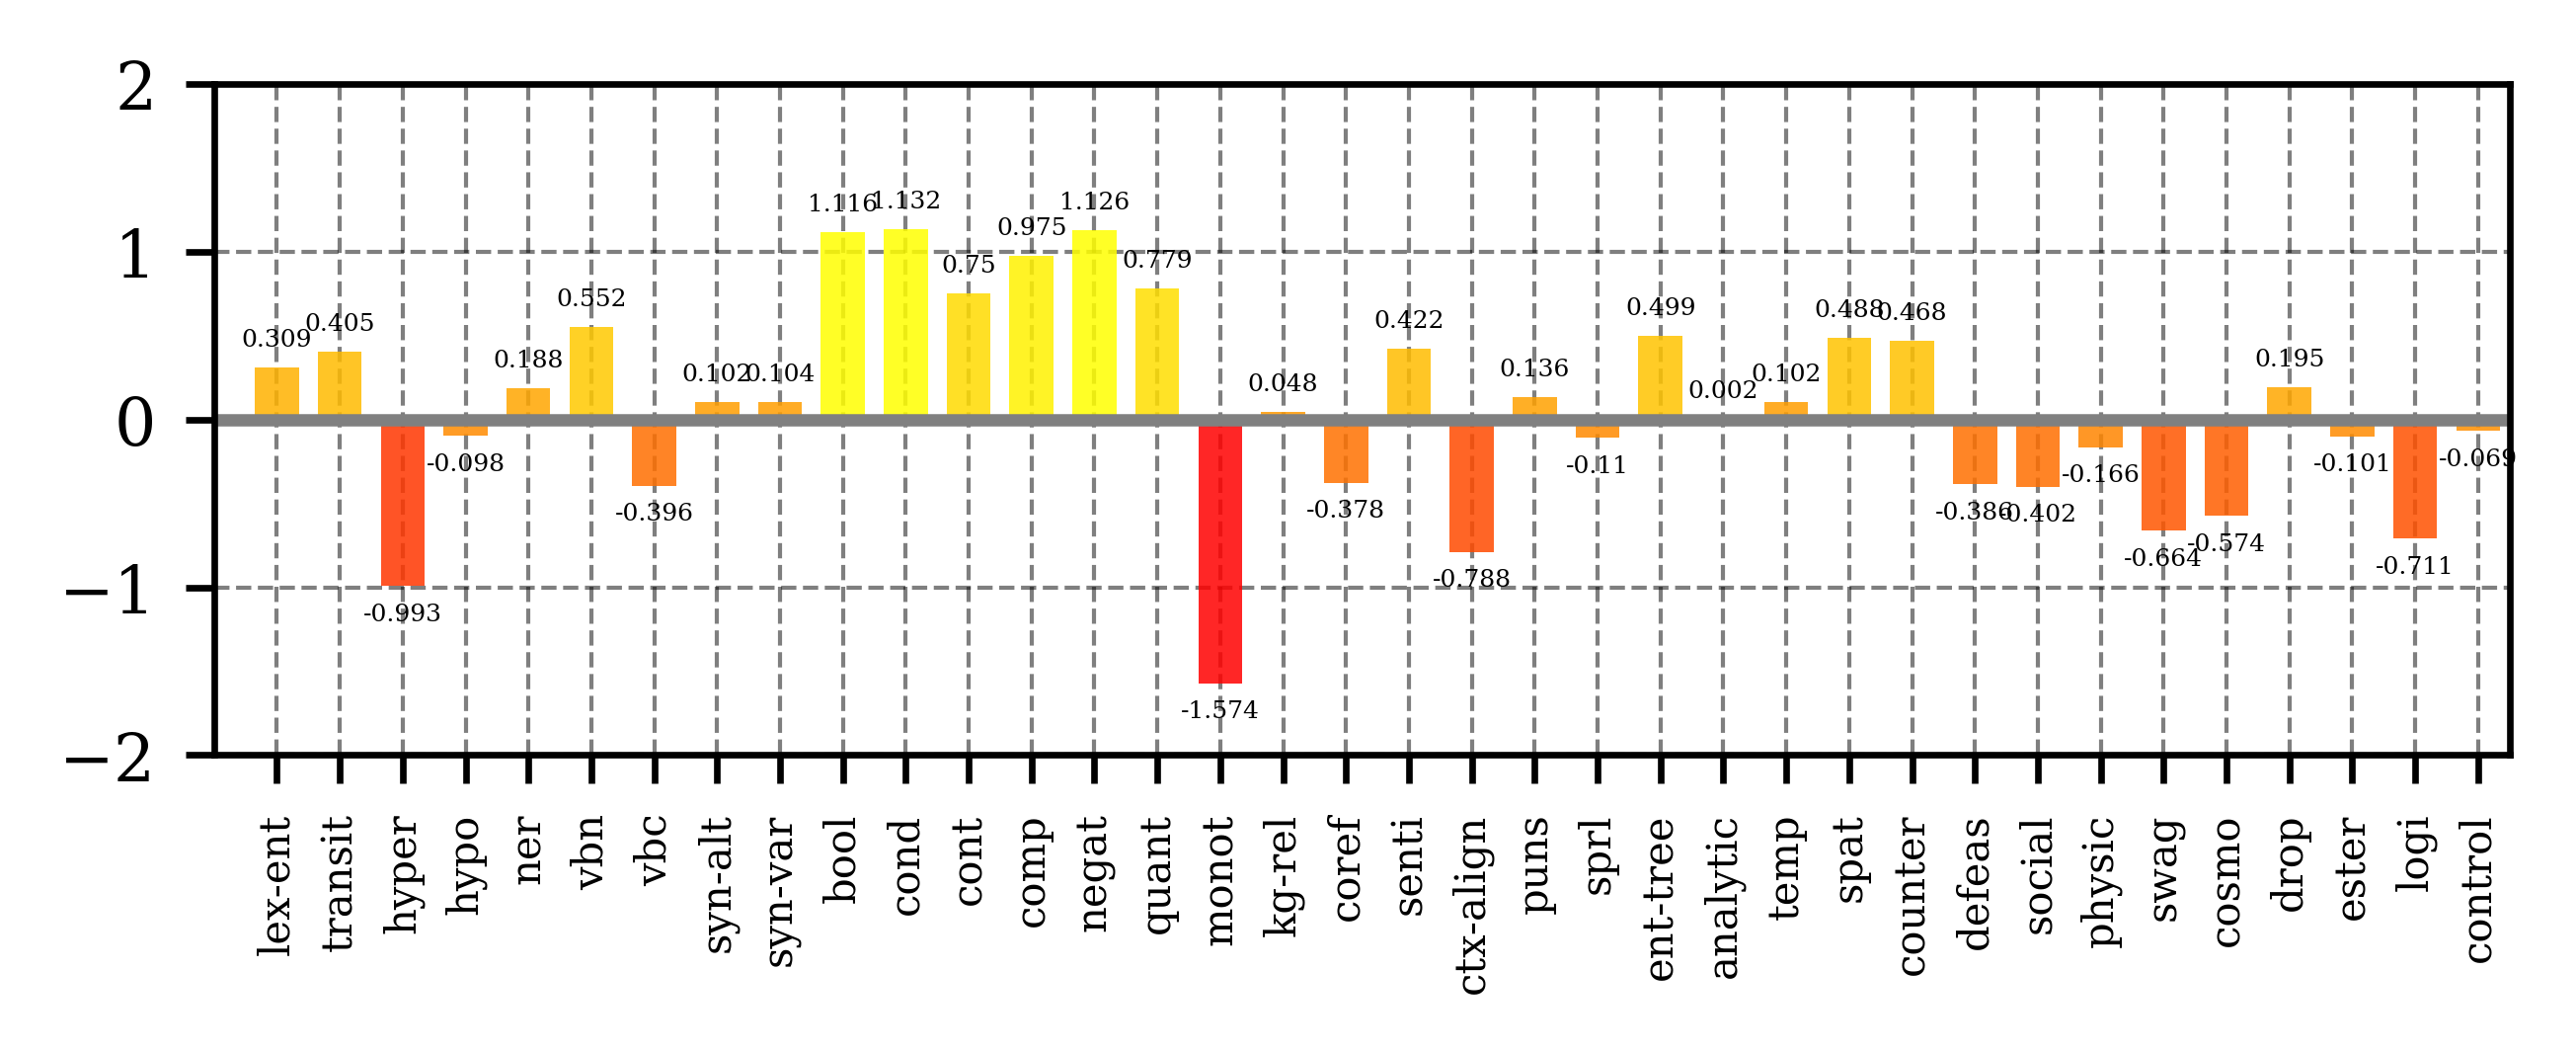

In [23]:
x = np.arange(len(task_names))
width = 0.7

my_cmap = plt.get_cmap("autumn")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

with plt.style.context(['ieee', 'grid']):
  fig = plt.figure(figsize=(5, 1.5))
  ax = fig.add_subplot(111)

  rect = ax.bar(x, difficulty, width, alpha=0.85, color=my_cmap(rescale(difficulty)))
  ax.bar_label(rect, padding=2, fontsize=3)

  ax.set_xticks(x)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(task_names, fontsize=5)
  ax.axhline(0, color='grey', linewidth=1.5)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 35.5])
  ax.set_ylim([-2, 2])

  fig.savefig(f'./plots/curriculum_v_info.pdf', bbox_inches='tight')

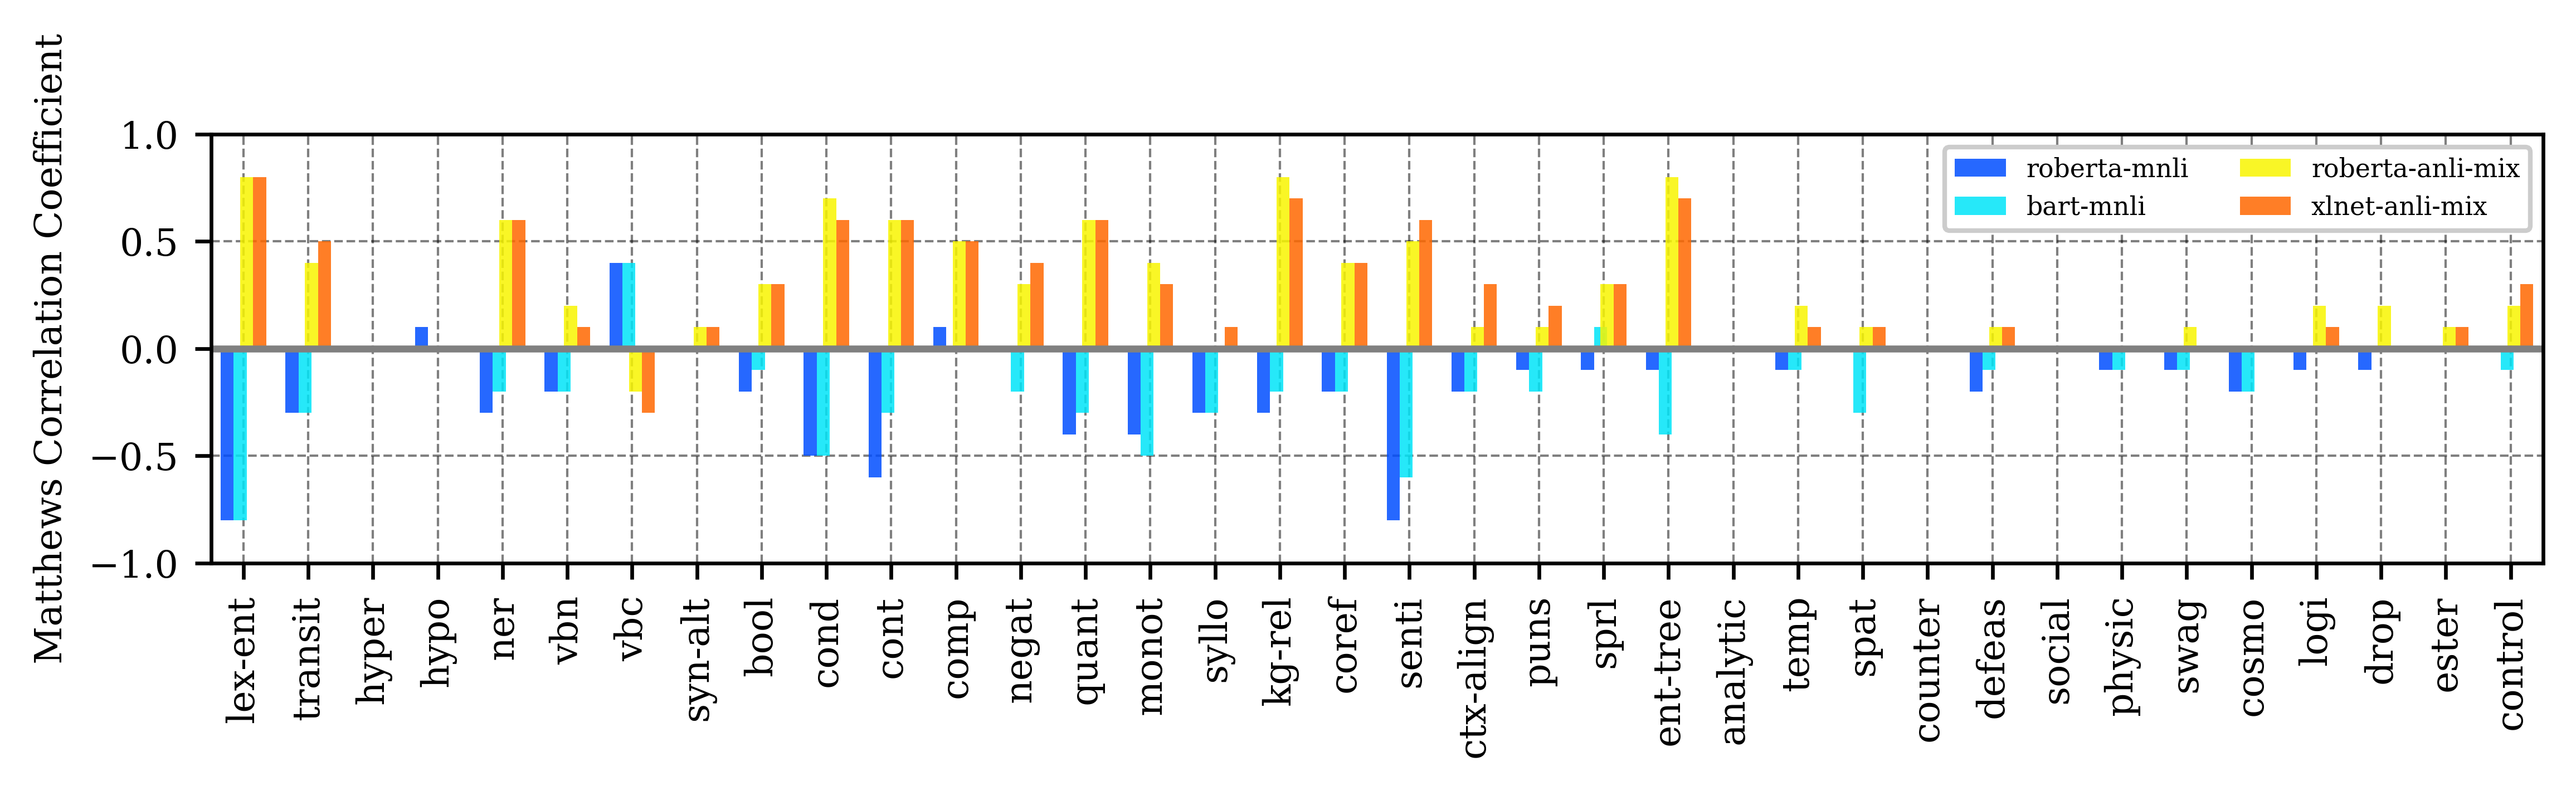

In [58]:
x = np.arange(len(task_names))
width = 0.2
label = ["roberta-mnli", "bart-mnli", "roberta-anli-mix", "xlnet-anli-mix", "roberta-glue"]
colors = plt.cm.jet(np.linspace(0.2,0.8,len(label)))
color_map = {}
for i, model in enumerate(label):
  color_map[model] = colors[i]
with plt.style.context(['ieee', 'grid']):
  fig = plt.figure(figsize=(9, 1.7))
  ax = fig.add_subplot(111)
  ax.bar(x - (width)/0.8, acc_list_mnli, width, label=label[0], alpha=0.85, color=color_map[label[0]])
  ax.bar(x - (width)/4, acc_list_bart_mnli, width, label=label[1], alpha=0.85, color=color_map[label[1]])
  ax.bar(x + (width)/4, acc_list_anli, width, label=label[2], alpha=0.85, color=color_map[label[3]])
  ax.bar(x + (width)/0.8, acc_list_xlnet, width, label=label[3], alpha=0.85, color=color_map[label[4]])

  ax.set_xticks(x)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(task_names)
  ax.axhline(0, color='grey', linewidth=1.5)
  ax.legend(loc="upper right", ncol=2, prop={'size': 5.5})
  ax.autoscale(tight=True)
  ax.set_xlim([-0.5, 35.5])
  ax.set_ylim([-1, 1])
  ax.set_ylabel("Matthews Correlation Coefficient")


  fig.savefig(f'./plots/curriculum_label.pdf', bbox_inches='tight')

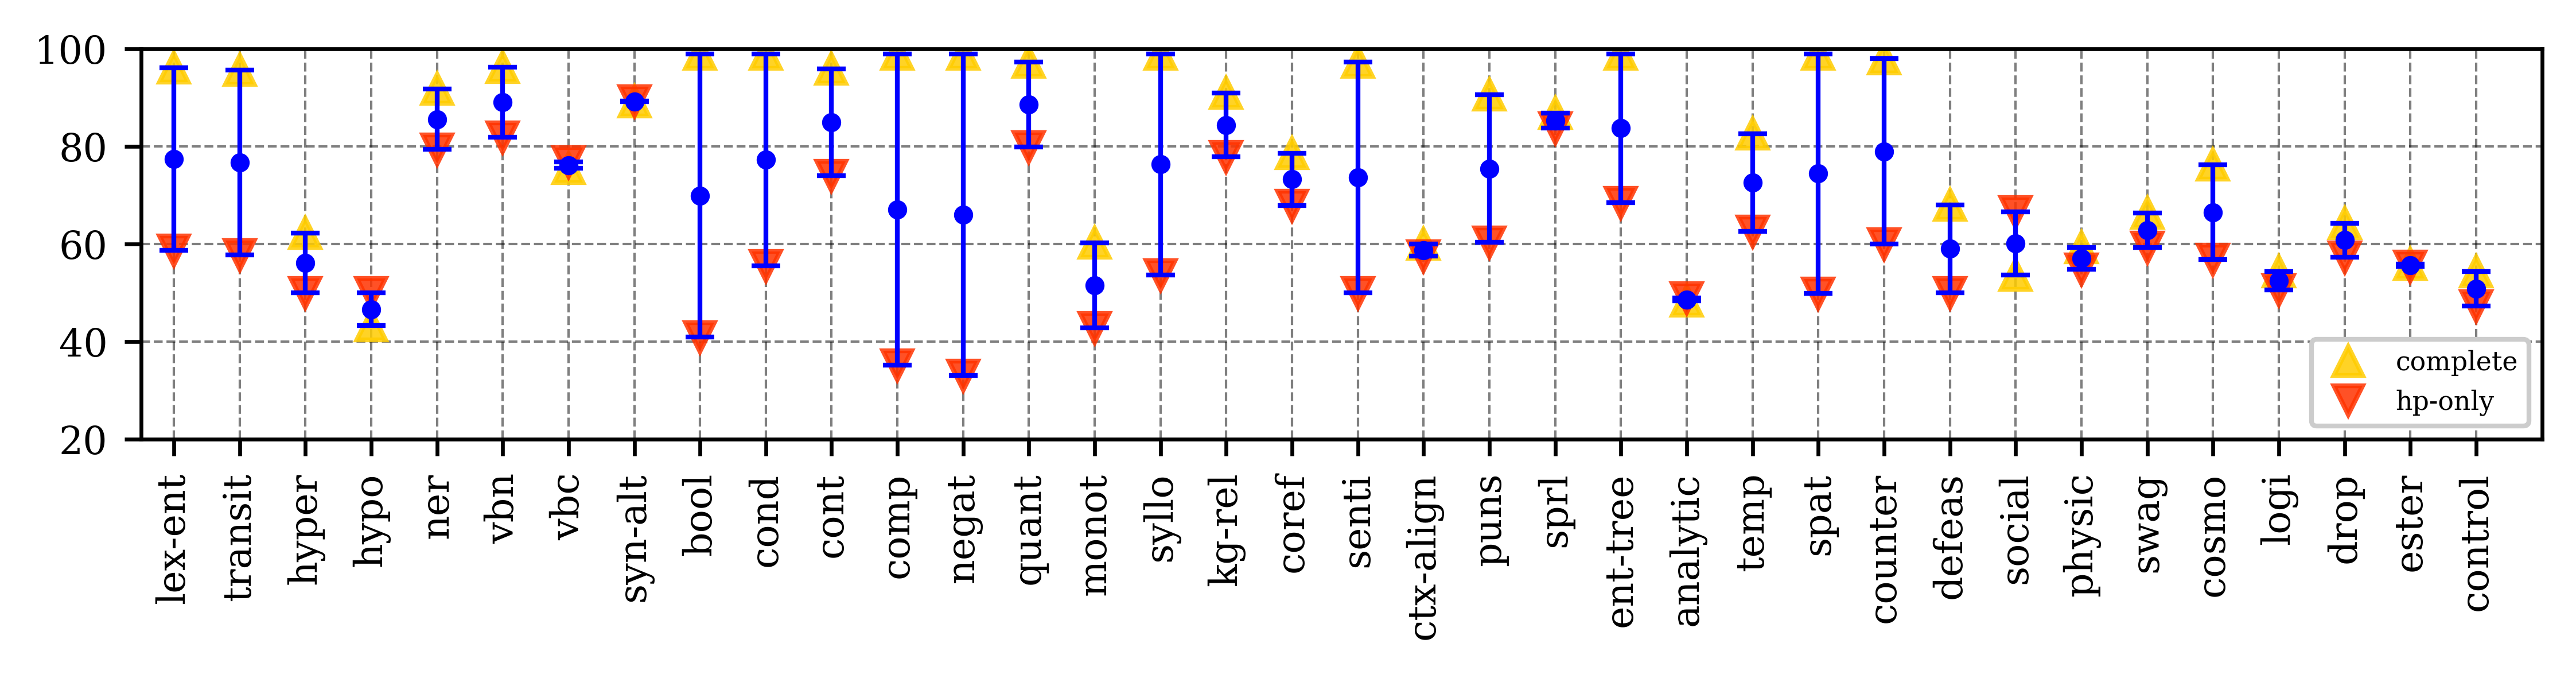

In [56]:
import numpy as np

inv_name = {v: k for k, v in name_convert.items()}
task_names = [
  "lex-ent", "transit", "hyper", "hypo", "ner",
  "vbn", "vbc", "syn-alt", #"syn-var",
  "bool", "cond", "cont", "comp",
  "negat", "quant", "monot", "syllo",
  "kg-rel", "coref", "senti", "ctx-align",
  "puns", "sprl", "ent-tree", "analytic",
  "temp", "spat", "counter", "defeas",
  "social", "physic","swag","cosmo",
  "logi", "drop", "ester","control"
]

model_name = "anli-mix-roberta"
#model_name = "roberta-anli"

labels = task_names
performance = []
finetuned = []
colors = []

data_weak = "#fc8d62"
model_weak = "#8da0cb"

for task_name in task_names:
  metrics = py_io.read_json(f"./runs/{name_convert.get(task_name, task_name)}/{model_name}/1000-shot-hp/val_metrics.json")
  acc = round(min(metrics['aggregated']*100, 99), 4)
  performance.append(acc)

for task_name in task_names:
  metrics = py_io.read_json(f"./runs/{name_convert.get(task_name, task_name)}/{model_name}/1000-shot/val_metrics.json")
  acc = round(min(metrics['aggregated']*100, 99), 4)
  finetuned.append(acc)

x = np.arange(len(labels))
width = 0.8

colors = plt.cm.autumn(np.linspace(0.2,0.8,3))
yerr = [(acc - acc_h) / 2 for (acc, acc_h) in zip(finetuned, performance)]
anchors = [acc_h + err for (acc_h, err) in zip(performance, yerr)]

with plt.style.context(['ieee', 'grid']):
  fig = plt.figure(figsize=(9, 1.5))
  ax = fig.add_subplot(111)
  ax.plot(x, finetuned, '^', color=colors[2], alpha=0.85, linewidth=1, label="complete")
  ax.plot(x, performance, 'v', color=colors[0], alpha=0.85, linewidth=1, label="hp-only")
  ax.errorbar(x, anchors, yerr, color='blue', fmt='.', linewidth=1, capsize=3)

  #bars = ax.bar(x, performance, width)
  #for bar, color in zip(bars, colors):
  #  bar.set_color(color)

  #for bar in bars:
  #  bar.set_hatch("//")
  #  bar.set_edgecolor('k')

  ax.set_xticks(x)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(labels)
  ax.autoscale(tight=True)
  ax.set_xlim([-0.5, len(labels)])
  ax.set_ylim([20, 100])
  ax.legend(loc="lower right", prop={'size': 5.5})

  fig.savefig(f'./plots/hp_only_{model_name}.pdf',  bbox_inches='tight')

In [176]:
import os

directory = "/Users/Admin/ray_results/nevergrad/"

task_pool = [
  "coreference", "kg_relations", "sentiment",
  "sprl", "puns", "context_align", "entailment_tree",
  "logiqa", "cosmoqa", "ester", "drop", "temporal",
  "spatial", "counterfactual", "lexical", "syntactic_variation"]

search_record = {}

for filename in os.listdir(directory):
    if "training_function" in filename:
      training_function = os.path.join(directory, filename)
      result_file = os.path.join(training_function, "result.json")
      try:
        result = py_io.read_json(result_file)
        objective = result['objective']
        config = result['config']
        curriculum = []
        for task in task_pool:
          if task in config.keys() and config[task] >= 0.5:
            curriculum.append(task)
        search_record[','.join(curriculum)] = objective
      except:
        continue
    else:
        continue

for filename in os.listdir("/Users/Admin/ray_results/ax/"):
    if "training_function" in filename:
      training_function = os.path.join(directory, filename)
      result_file = os.path.join(training_function, "result.json")
      try:
        result = py_io.read_json(result_file)
        objective = result['objective']
        config = result['config']
        curriculum = []
        for task in task_pool:
          if task in config.keys() and config[task] >= 0.5:
            curriculum.append(task)
        search_record[','.join(curriculum)] = objective
      except:
        continue
    else:
        continue

py_io.write_json(search_record, "./ray_tune_record.json")

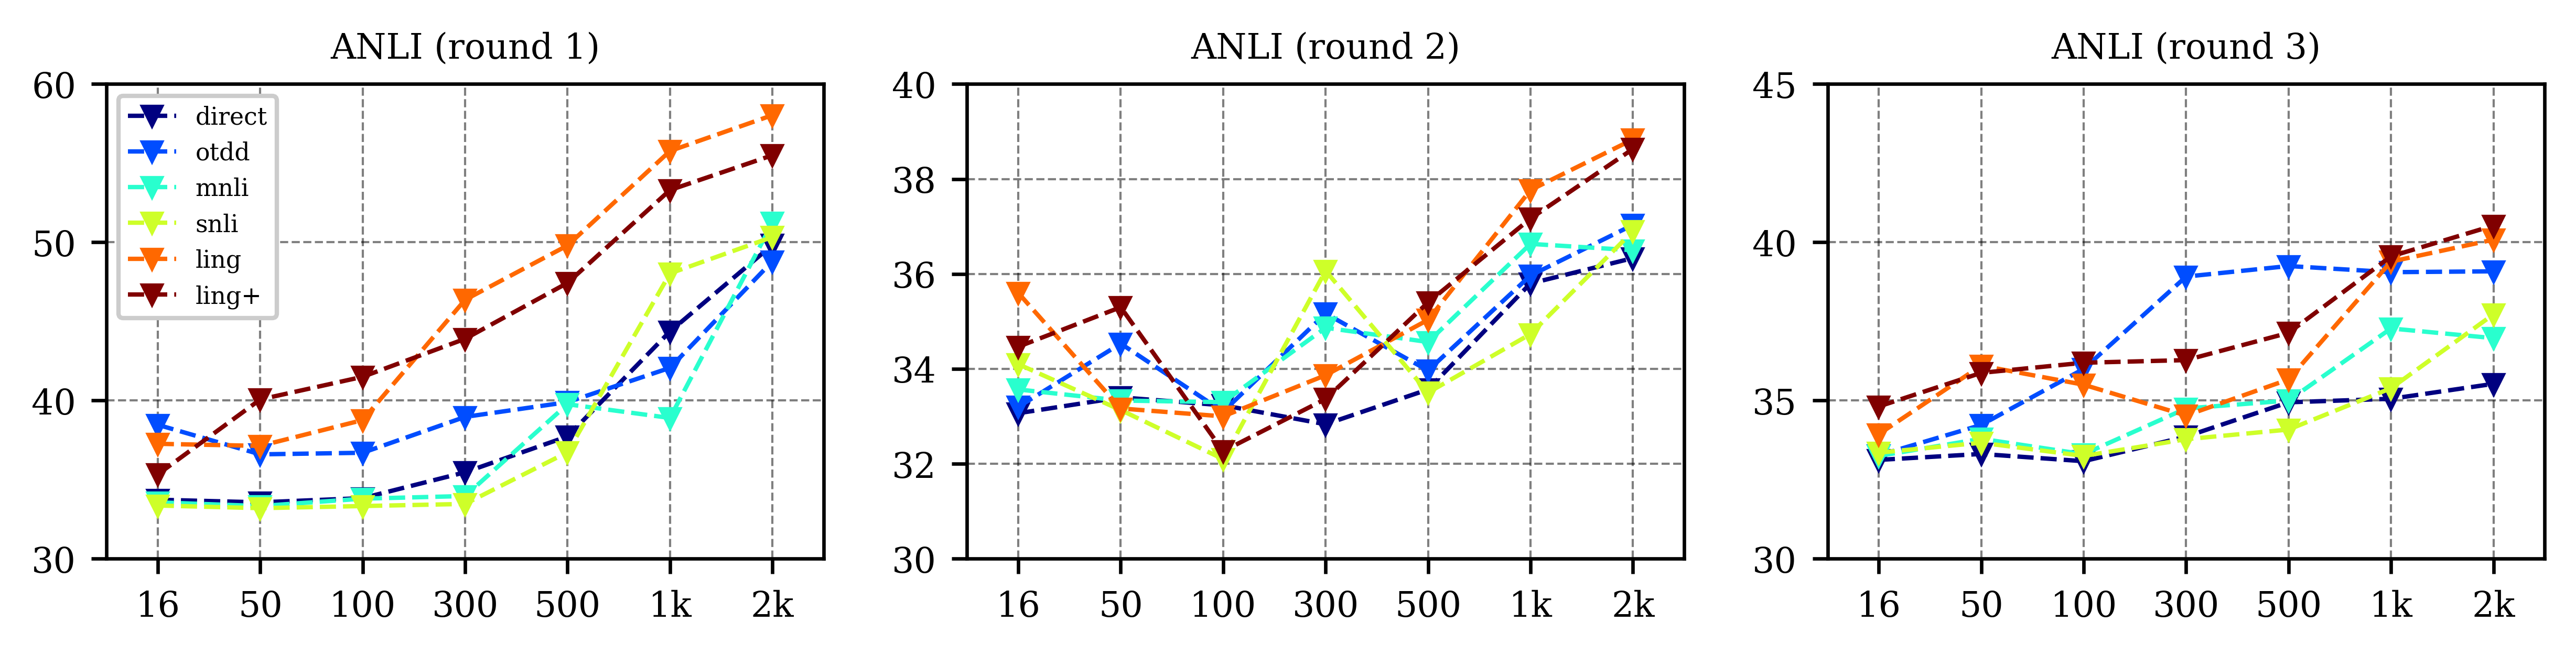

In [94]:
import numpy as np
import matplotlib.pylab as pl

shots = [16, 50, 100, 300, 500, "1k", "2k"]
colors = []
models = ["direct", "otdd", "mnli", "snli", "ling", "ling+", ]

human_few_shot = py_io.read_json("./few_acc_human.json")
human_plus_few_shot = py_io.read_json("./few_acc_human+.json")
base_few_shot = py_io.read_json("./few_acc_base.json")
machine_few_shot = py_io.read_json("./few_acc_machine.json")
mnli_few_shot = py_io.read_json("./few_acc_mnli.json")
snli_few_shot = py_io.read_json("./few_acc_snli.json")

human_few_r1 = [acc*100 for acc in human_few_shot['acc_r1']]
human_plus_few_r1 = [acc*100 for acc in human_plus_few_shot['acc_r1']]
base_few_r1 = [acc*100 for acc in base_few_shot['acc_r1']]
machine_few_r1 = [acc*100 for acc in machine_few_shot['acc_r1']]
mnli_few_r1 = [acc*100 for acc in mnli_few_shot['acc_r1']]
snli_few_r1 = [acc*100 for acc in snli_few_shot['acc_r1']]

human_few_r2 = [acc*100 for acc in human_few_shot['acc_r2']]
human_plus_few_r2 = [acc*100 for acc in human_plus_few_shot['acc_r2']]
base_few_r2 = [acc*100 for acc in base_few_shot['acc_r2']]
machine_few_r2 = [acc*100 for acc in machine_few_shot['acc_r2']]
mnli_few_r2 = [acc*100 for acc in mnli_few_shot['acc_r2']]
snli_few_r2 = [acc*100 for acc in snli_few_shot['acc_r2']]

human_few_r3 = [acc*100 for acc in human_few_shot['acc_r3']]
human_plus_few_r3 = [acc*100 for acc in human_plus_few_shot['acc_r3']]
base_few_r3 = [acc*100 for acc in base_few_shot['acc_r3']]
machine_few_r3 = [acc*100 for acc in machine_few_shot['acc_r3']]
mnli_few_r3 = [acc*100 for acc in mnli_few_shot['acc_r3']]
snli_few_r3 = [acc*100 for acc in snli_few_shot['acc_r3']]

x = np.arange(len(shots))
colors = pl.cm.jet(np.linspace(0, 1, len(models)))
color_map = {}
for i, task in enumerate(models):
  color_map[task] = colors[i]

def generate_few_shot_plot(ax, few_acc, range):
  ax.plot(x, few_acc[0], 'v', label=models[0], color=color_map[models[0]], linewidth=1, linestyle="dashed", markersize=4)
  ax.plot(x, few_acc[1], 'v', label=models[1], color=color_map[models[1]], linewidth=1, linestyle="dashed", markersize=4)
  ax.plot(x, few_acc[2], 'v', label=models[2], color=color_map[models[2]], linewidth=1, linestyle="dashed", markersize=4)
  ax.plot(x, few_acc[3], 'v', label=models[3], color=color_map[models[3]], linewidth=1, linestyle="dashed", markersize=4)
  ax.plot(x, few_acc[4], 'v', label=models[4], color=color_map[models[4]], linewidth=1, linestyle="dashed", markersize=4)
  ax.plot(x, few_acc[5], 'v', label=models[5], color=color_map[models[5]], linewidth=1, linestyle="dashed", markersize=4)

  ax.set_xticks(x)
  ax.set_xticklabels(shots)
  ax.autoscale(tight=True)
  ax.set_xlim([-0.5, len(shots)-0.5])
  ax.set_ylim([range[0], range[1]])

with plt.style.context(['ieee', 'grid']):
  fig = plt.figure(figsize=(10, 2))
  ax = fig.add_subplot(131)
  generate_few_shot_plot(ax, [
    base_few_r1, machine_few_r1,
    mnli_few_r1, snli_few_r1,
    human_few_r1, human_plus_few_r1], [30,60])
  ax.legend(loc="upper left", ncol=1, prop={'size': 5.5})
  ax.set_title("ANLI (round 1)", fontsize=8)

  ax1 = fig.add_subplot(132)
  generate_few_shot_plot(ax1, [
    base_few_r2, machine_few_r2,
    mnli_few_r2, snli_few_r2,
    human_few_r2, human_plus_few_r2,], [30,40])
  ax1.set_title("ANLI (round 2)", fontsize=8)

  ax2 = fig.add_subplot(133)
  generate_few_shot_plot(ax2, [
    base_few_r3, machine_few_r3,
    mnli_few_r3, snli_few_r3,
    human_few_r3, human_plus_few_r3], [30,45])
  ax2.set_title("ANLI (round 3)", fontsize=8)

  fig.savefig(f'./plots/few-shot-anli.pdf', bbox_inches='tight')

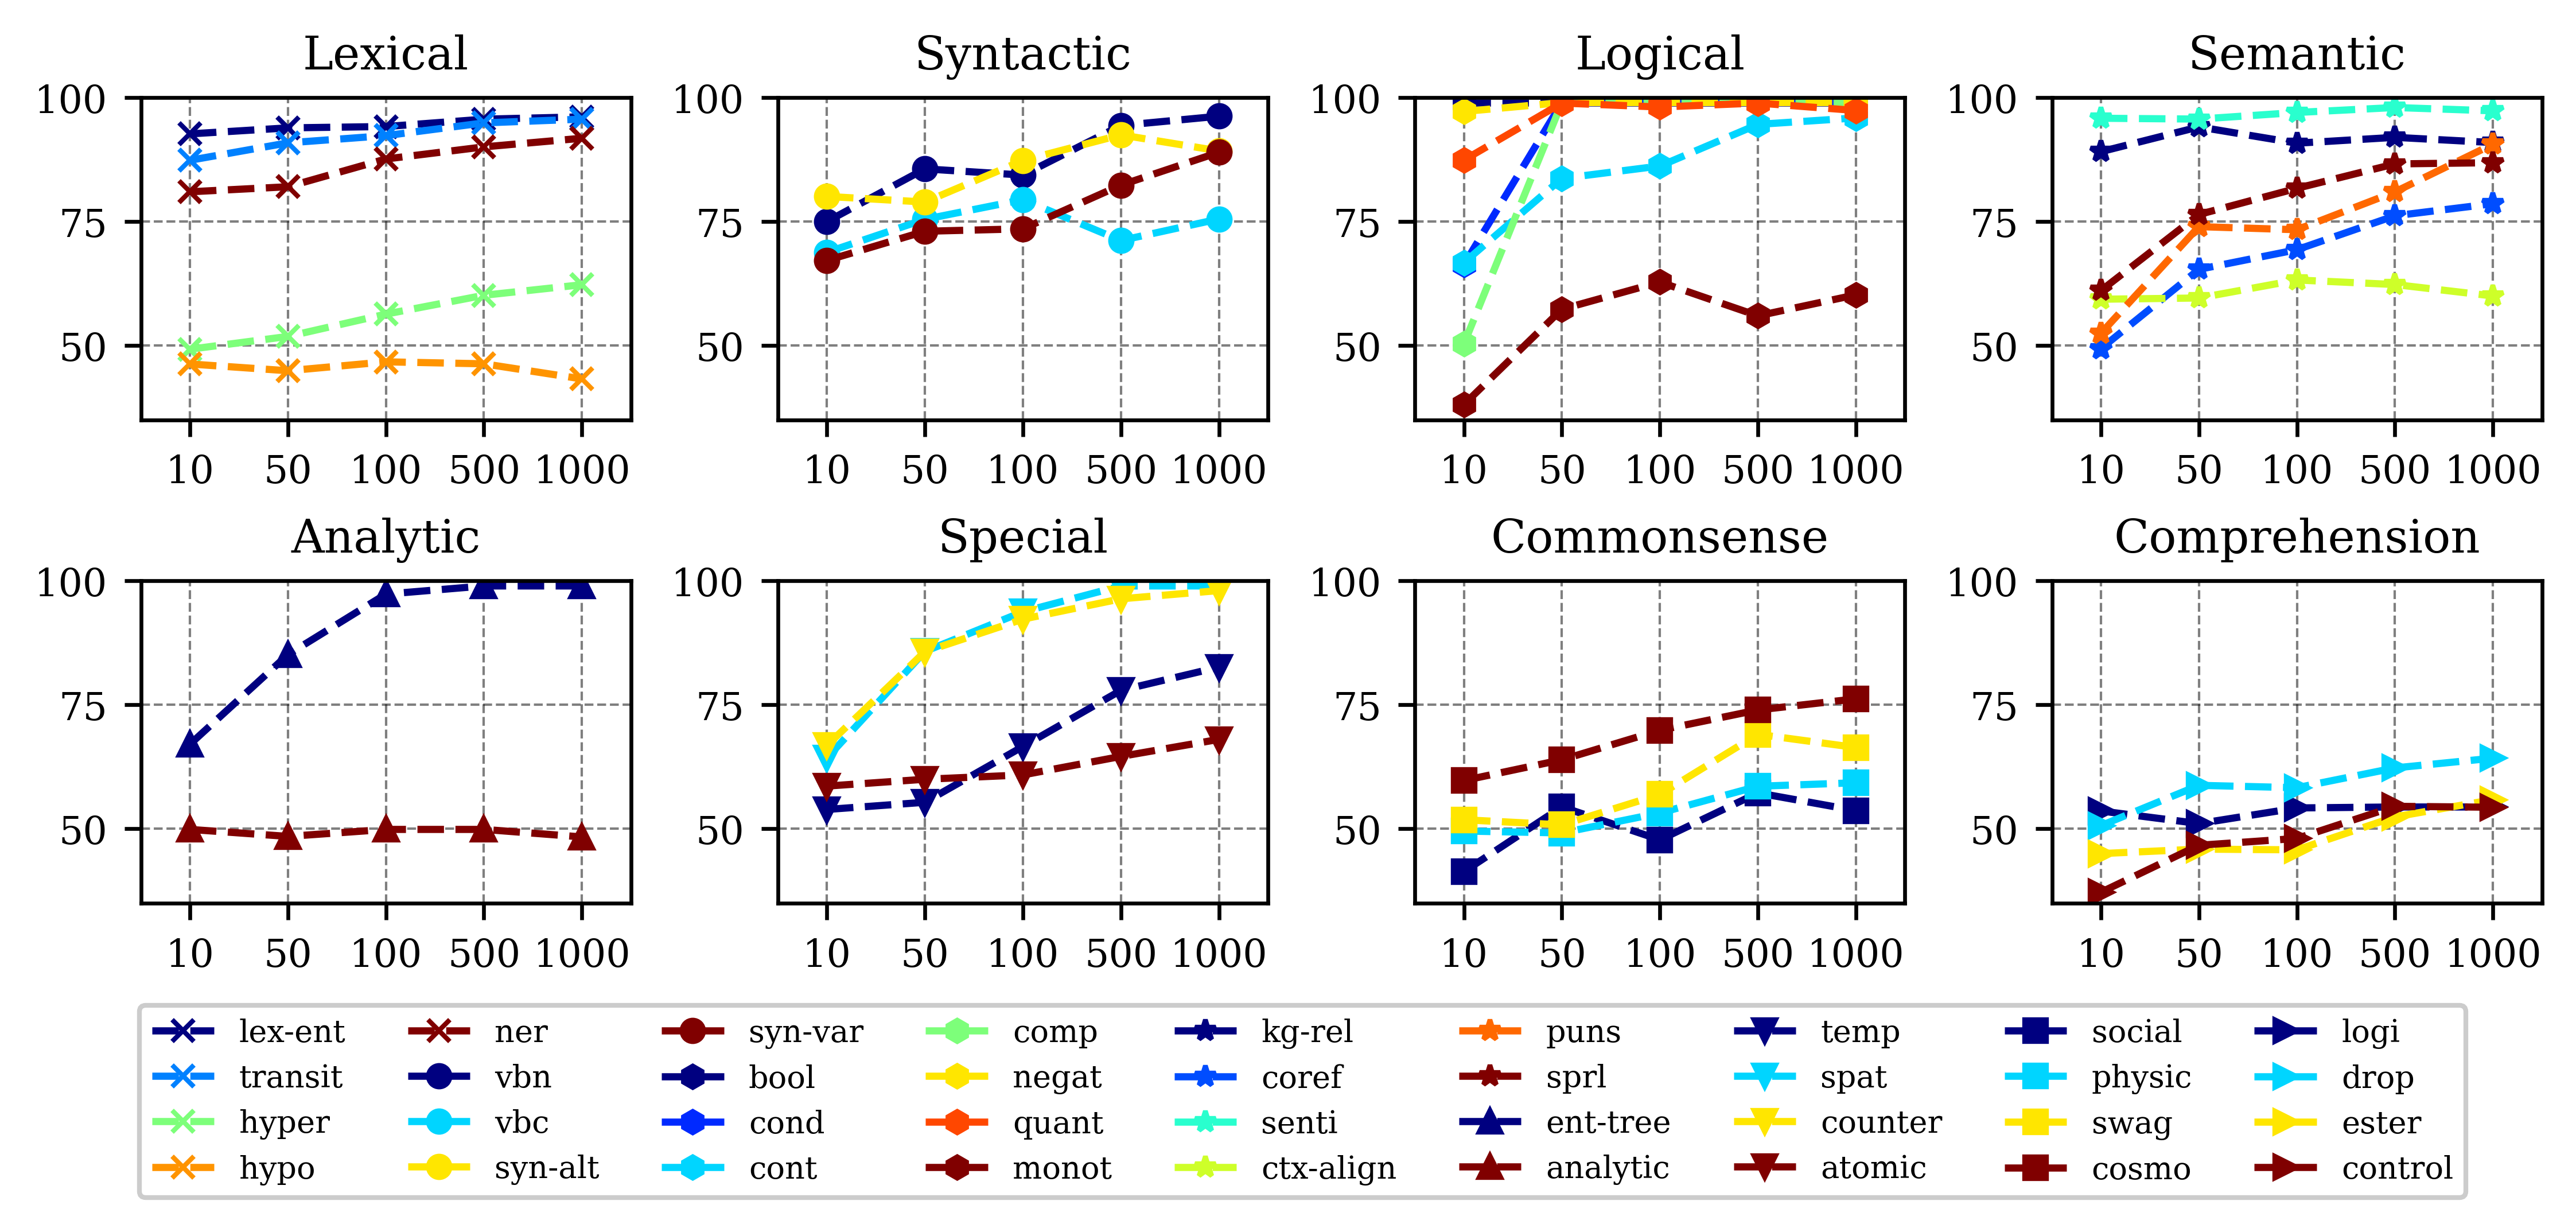

In [95]:
inv_name = {v: k for k, v in name_convert.items()}

model_name = "anli-mix-roberta"
task_names1 = [
  "lex-ent", "transit", "hyper", "hypo", "ner"
]
task_names2 = ["vbn", "vbc", "syn-alt", "syn-var"]
task_names3 = [
  "bool", "cond", "cont", "comp",
  "negat", "quant", "monot"
]
task_names4 = [
  "kg-rel", "coref", "senti",
  "ctx-align", "puns", "sprl"
]
task_names5 = ["ent-tree", "analytic"]
task_names6 = ["temp", "spat", "counter", "atomic"]
task_names7 = ["social", "physic", "swag", "cosmo"]
task_names8 = ["logi", "drop", "ester", "control"]


labels = []
performance = []
colors = []

data_weak = "#fc8d62"
model_weak = "#8da0cb"

def get_k_shot_metric(task, n_shot):
  metrics = py_io.read_json(f"./runs/{name_convert.get(task, task)}/anli-mix-roberta/{n_shot}-shot/val_metrics.json")
  acc = min(metrics['aggregated']*100, 99)
  return round(acc, 4)

num_train = [10, 50, 100, 500, 1000]

"""acc_report = {}

for task_name in task_names:
  accuracy_span = []
  for k_shot in num_train:
    accuracy = get_k_shot_metric(task_name, k_shot)
    accuracy_span.append(accuracy)
  acc_report[task_name] = accuracy_span"""

x = np.arange(len(num_train))
colors = plt.cm.jet(np.linspace(0,1,len(task_names)))
color_map = {}
for i, task in enumerate(task_names):
  color_map[task] = colors[i]
marks = ['x', 'o', 'h', '*', '^', 'v', 's','>']

def generate_plot(ax, tasks, linestyle, mark, title):
  acc_report = {}
  colors = plt.cm.jet(np.linspace(0,1,len(tasks)))
  for i, task_name in enumerate(tasks):
    accuracy_span = []
    for k_shot in num_train:
      accuracy = get_k_shot_metric(task_name, k_shot)
      accuracy_span.append(accuracy)
    acc_report[task_name] = accuracy_span
    ax.plot(x, accuracy_span, mark, markersize=4.5, label=task_name, linestyle=linestyle, color=colors[i])

  ax.set_xticks(x)
  ax.set_xticklabels(num_train)
  ax.autoscale(tight=True)
  ax.set_xlim([-0.5, len(num_train)-0.5])
  ax.set_ylim([35, 100])
  ax.set_title(title)

with plt.style.context(['ieee', 'grid']):
  fig = plt.figure(figsize=(9, 3))
  ax = fig.add_subplot(241)
  generate_plot(ax, task_names1, 'dashed', marks[0], "Lexical")

  ax1 = fig.add_subplot(242)
  generate_plot(ax1, task_names2, 'dashed', marks[1], "Syntactic")

  ax2 = fig.add_subplot(243)
  generate_plot(ax2, task_names3, 'dashed', marks[2], "Logical")

  ax3 = fig.add_subplot(244)
  generate_plot(ax3, task_names4, 'dashed', marks[3], "Semantic")

  ax4 = fig.add_subplot(245)
  generate_plot(ax4, task_names5, 'dashed', marks[4], "Analytic")

  ax5 = fig.add_subplot(246)
  generate_plot(ax5, task_names6, 'dashed', marks[5], "Special")

  ax6 = fig.add_subplot(247)
  generate_plot(ax6, task_names7, 'dashed', marks[6], "Commonsense")

  ax7 = fig.add_subplot(248)
  generate_plot(ax7, task_names8, 'dashed', marks[7], "Comprehension")

  handles1, labels1 = ax.get_legend_handles_labels()
  handles2, labels2 = ax1.get_legend_handles_labels()
  handles3, labels3 = ax2.get_legend_handles_labels()
  handles4, labels4 = ax3.get_legend_handles_labels()
  handles5, labels5 = ax4.get_legend_handles_labels()
  handles6, labels6 = ax5.get_legend_handles_labels()
  handles7, labels7 = ax6.get_legend_handles_labels()
  handles8, labels8 = ax7.get_legend_handles_labels()
  handels = handles1+handles2 + handles3 + handles4+handles5+handles6+handles7+handles8
  labels_all = labels1+labels2 +labels3+labels4+labels5+labels6+labels7+labels8

  plt.subplots_adjust(bottom=0.1, wspace=0.3, hspace = 0.5)

  fig.legend(handels, labels_all, loc="lower center", ncol=9,  bbox_to_anchor=(0.5, -0.2), prop={'size': 6.5})
  fig.savefig(f'./plots/inoculation_{model_name}.pdf', bbox_inches='tight')

In [ ]:
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  bars = ax.bar(x, performance, width)
  for bar, color in zip(bars, colors):
    bar.set_color(color)

  for bar in bars:
    bar.set_hatch("//")
    bar.set_edgecolor('k')

  ax.set_xticks(x)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(labels)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, len(labels)])
  ax.set_ylim([0, 100])
  ax.set_facecolor('#eaeaf2')

In [ ]:
import seaborn as sn
import numpy as np

with plt.style.context(['ieee']):
  fig = plt.figure(figsize=(4, 2))
  ax = fig.add_subplot(111)
  #cmap = "YlGn"
  cmap = "YlGnBu"
  #cmap = sn.diverging_palette(145, 300, s=60, as_cmap=True)

  data = np.random.randn(7, 11)
  data = [[round(x*100, 1) for x in row] for row in data]
  train_sets = ["lexical","syntactic","logical","semantic","commonsense","knowledge","special"]
  val_sets = ["lexical","syntactic","logical","semantic","commonsense","knowledge","special","drop","ester","logiqa","cosmoqa"]

  plt.xticks(rotation = 30)
  hm = sn.heatmap(data=data, annot=True,
                  cbar=False, cmap=cmap,
                  xticklabels=val_sets,
                  yticklabels=train_sets,
                  ax=ax, vmin=0, vmax=100)
  plt.show()

In [255]:
import seaborn as sn
import numpy as np

task_names = ["lexical","transitive", "hypernymy", "hyponymy","ner", "verbnet",
              "verbcorner", "syntactic_alternation", "syntactic_variation",
              "boolean", "conditional", "comparative", "counting", "quantifier",
              "negation",  "monotonicity_infer", "coreference",
              "sentiment", "kg_relations", "puns", "sprl", "context_align",
              "analytic","entailment_tree", "socialqa", "physicalqa",
              "hellaswag", "cosmoqa", "temporal", "spatial", "counterfactual",
              "atomic", "logiqa", "ester", "drop", "control"]
modes = [
  'simple_simple', 'simple_hard',
  'hard_simple', 'hard_hard']

def get_split_metric(task, mode):
  metrics = py_io.read_json(f"./runs/{task}/anli-mix-roberta/1000-shot-{mode}/val_metrics.json")
  acc = min(metrics['aggregated']*100, 99)
  return round(acc, 4)

plot_data = []
for task in task_names:
  split_metrics = np.array([get_split_metric(task, mode) for mode in modes])
  plot_data.append(split_metrics.reshape((2, 2)))

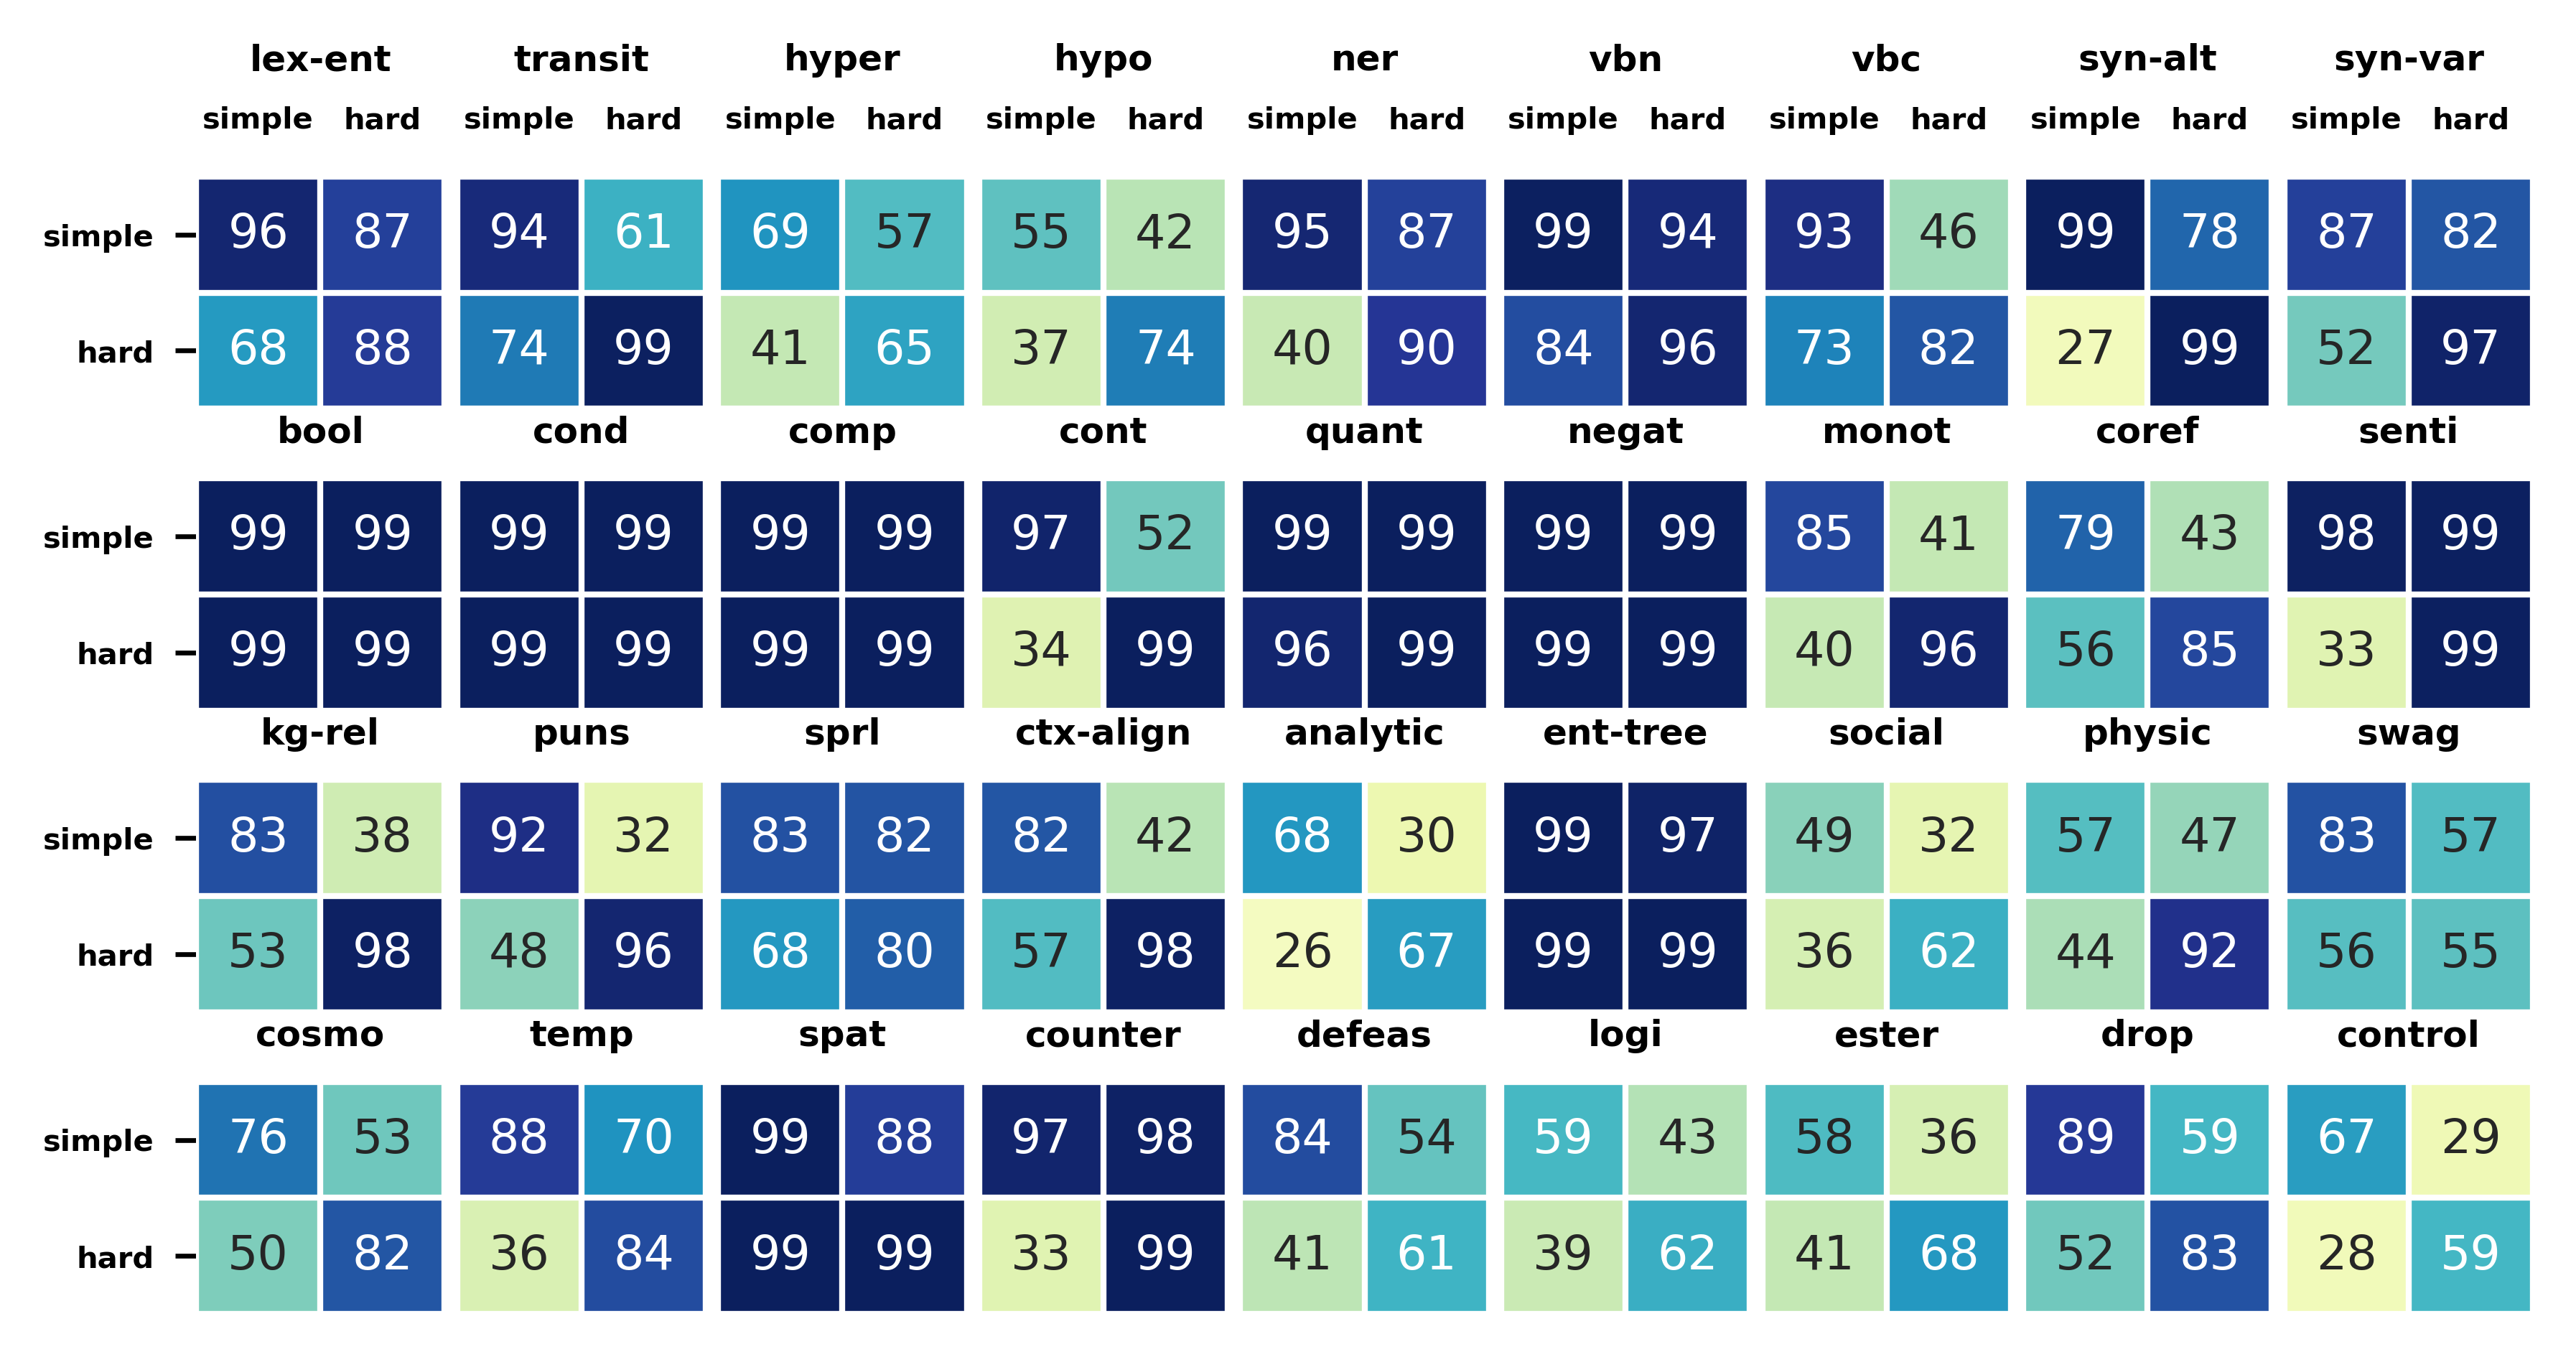

In [256]:
import seaborn as sn
import numpy as np

subplot_indices = [i for i in range(491, 491+36)]
cmap = "YlGnBu"
train_sets = ["simple", 'hard']
val_sets = ["simple", 'hard']

inv_name = {v: k for k, v in name_convert.items()}

def plot_heatmap(data, fig, title, index):
  ax = fig.add_subplot(4, 9, index+1)
  plt.tick_params(labelbottom = False, bottom=False, top=False, labeltop=True)
  ax.set_title(title, fontsize=6, fontweight='bold')
  plt.xticks(rotation=0, fontsize=5, fontweight='bold')
  if index % 9 == 0:
    yticklabels = train_sets
  else:
    yticklabels = False
  if index < 9:
    xticklabels = train_sets
  else:
    xticklabels = False
  hm = sn.heatmap(data=data, annot=True,
                  cbar=False, cmap=cmap,
                  xticklabels=xticklabels,
                  yticklabels=yticklabels,
                  annot_kws={"fontsize":8},
                  ax=ax, vmin=20, vmax=100)
  plt.yticks(rotation=0, fontsize=5, fontweight='bold')

  for i in range(data.shape[0] + 1):
    ax.axhline(i, color='white', lw=1)
  for i in range(data.shape[1] + 1):
    ax.axvline(i, color='white', lw=1)

with plt.style.context(['ieee']):
  fig = plt.figure(figsize=(7, 3))
  fig.tight_layout()

  for i, (task, data) in enumerate(zip(task_names, plot_data)):
    plot_heatmap(data, fig, title=inv_name.get(task, task), index=i)

  plt.subplots_adjust(bottom=0.0, wspace = 0.05, hspace = 0.3)
  plt.show()
  fig.savefig(f'./plots/controlled_generalize.pdf', bbox_inches='tight')

In [ ]:
from math import log2
import jiant.utils.python.io as py_io

def get_dataset_entropy(class_counter, n_total):
  entropy = 0
  for label in class_counter.keys():
    prob = class_counter[label] / n_total
    prob_entropy = prob * log2(prob)
    #print(label)
    #print(prob)
    #print(prob_entropy)
    entropy += -prob_entropy
  return entropy

def get_information_gain(loss_main, loss_control, entropy):
  gain =  loss_control - loss_main
  gain_percent = gain / entropy
  return gain, gain_percent

def count_example_per_class(dataset):
    class_counter = {}
    for i, line in enumerate(dataset):
        label = line['gold_label']
        if label not in class_counter:
            class_counter[label] = 1
        else:
            class_counter[label] += 1
    return class_counter, i

In [ ]:
def information_probing(task_name, model_name):
  base_metircs = py_io.read_json(f"./runs/curriculum/{model_name}/val_metrics.json")
  target_metircs = py_io.read_json(f"./runs/{task_name}/{model_name}/1000-shot/val_metrics.json")
  base_loss = base_metircs[task_name]['loss']
  target_loss = target_metircs[task_name]['loss']

  test_dataset = py_io.read_jsonl(f"/content/tasks/curriculum/{task_name}/val.jsonl")
  test_data_counter, test_n_total = count_example_per_class(test_dataset)

  test_entropy = get_dataset_entropy(test_data_counter, test_n_total)
  info_gain, gain_percent = get_information_gain(target_loss, base_loss, test_entropy)
  #print("Control Entropy: ", base_loss)
  #print("Main Entropy: ", target_loss)
  #print("Testset Entropy: ", test_entropy)
  #print("Mutual Information Gain: ", round(info_gain, 3))
  #print("Mutual Infromation Gain Percentage: ", round(gain_percent * 100, 1))
  return round(info_gain, 3), round(gain_percent * 100, 1)

information_probing("monotonicity_infer", "anli-mix-roberta")

In [ ]:
challenges = [
  "hypernymy", "hyponymy", "verbnet", "coreference",
  "monotonicity_infer", "context_align", "entailment_tree",
  "drop", "logiqa", "ester", "cosmoqa", "atomic", "social_chem",
  "socialqa", "physicalqa", "spatial", "counterfactual"]

information_gain_report = {}

for task in challenges:
  info_gain, gain_percent = information_probing(task, "anli-mix-roberta")
  information_gain_report[task] = {
    "gain": info_gain,
    "gain_percent": gain_percent
  }

information_gain_report

In [ ]:
py_io.write_json(information_gain_report, "inocculate_information_gain")

In [4]:
class InferenceTree:

  def __init__(self, alignment_pairs):
    self.alignments = alignment_pairs

  def build_tree(self):
    for s, t in self.alignments:
      pass

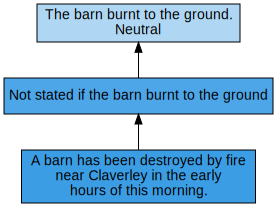

In [29]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
  graph = graphviz.Source(dot_graph)
  graph.format = "png"
  graph.render("anli_n_exp3")
graph

In [2]:
from transformers import AutoTokenizer, AutoModel

model_dict = {
        "bert_base": "textattack/bert-base-uncased-MNLI",
        "bert_large": "sentence-transformers/bert-large-nli-mean-tokens",
        "roberta_base": "textattack/roberta-base-MNLI",
        "roberta_large": "roberta-large",
        "deberta_base": "microsoft/deberta-base-mnli",
        "mnli_bart": "textattack/facebook-bart-large-MNLI",
        "anli_roberta": "ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli",
        "anli_xlnet": "ynie/xlnet-large-cased-snli_mnli_fever_anli_R1_R2_R3-nli",
        "anli_roberta_small": "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli",
    }

model_name = model_dict['roberta_large']
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()
model.to('cuda')

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaModel(
  (invertible_adapters): ModuleDict()
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024, padding_idx=1)
    (token_type_embeddings): Embedding(1, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, e

In [3]:
import torch
import jiant.utils.python.io as py_io

from tqdm import tqdm
from sentence_transformers import util

dataset_target = py_io.read_jsonl('/content/tasks/data/adversarial_nli_r1/val.jsonl')

features_target_r1 = []

with torch.no_grad():
    for data in tqdm(dataset_target):
        premises = data["context"]
        hypothesis = data["hypothesis"]
        tokens = tokenizer(premises, hypothesis, return_tensors="pt")
        tokens.to('cuda')
        outputs = model(**tokens)
        features = outputs.pooler_output
        features_target_r1.append(features)

features_target_r1_pt = torch.vstack(features_target_r1)
features_target_r1_sum = torch.mean(features_target_r1_pt, 0)

100%|██████████| 1000/1000 [00:19<00:00, 52.09it/s]


In [15]:
from sentence_transformers import SentenceTransformer
import jiant.utils.python.io as py_io

model = SentenceTransformer('all-roberta-large-v1')

dataset_target = py_io.read_jsonl('/content/tasks/data/adversarial_nli_r3/train.jsonl')
features_target_r1 = []
target_input = []

for i, data in enumerate (dataset_target):
    target_input.append(data["context"] + " " + data["hypothesis"])

emb_tgt_r1 = model.encode(target_input, convert_to_tensor=True)

In [2]:
dataset_source = py_io.read_jsonl('/content/tasks/curriculum/kg_relations/train.jsonl')
source_input = []
for i, data in enumerate(dataset_source):
    if i > 10000:
        break
    source_input.append(data["premise"] + " " + data["hypothesis"])
emb_src_ester = model.encode(source_input, convert_to_tensor=True)

In [19]:
import torch
from torch.utils.data import TensorDataset

tgt_classes = {'e':0,'n':1,'c':2}
src_classes = {'entailed':0,'not-entailed':1}
src_nli_classes = {'entailment':0,'neutral':1,'contradiction':2}

labels_tgt_r1 = [tgt_classes[data['label']] for data in dataset_target]
labels_src_ester = [src_classes[data['gold_label']] for data in dataset_source]

source_embs = torch.load("./curriculum_cls.pt")

def dataset_from_numpy(X, Y, classes = None):
    targets =  torch.LongTensor(Y)
    ds = TensorDataset(X, targets)
    ds.targets = targets
    ds.classes = classes if classes is not None else [i for i in range(len(np.unique(Y)))]
    return ds

ds_tgt_r1 = dataset_from_numpy(emb_tgt_r1, labels_tgt_r1, list(tgt_classes.keys()))
ds_src_ester = dataset_from_numpy(source_embs['ester'], labels_src_ester[:10001], list(src_classes.keys()))

In [16]:
dataset_target_r2 = py_io.read_jsonl('/content/tasks/data/adversarial_nli_r2/val.jsonl')

features_target_r2 = []

with torch.no_grad():
    for data in tqdm(dataset_target_r2):
        premises = data["context"]
        hypothesis = data["hypothesis"]
        tokens = tokenizer(premises, hypothesis, return_tensors="pt")
        tokens.to('cuda')
        outputs = model(**tokens)
        features = outputs.pooler_output
        features_target_r2.append(features)

features_target_r2_pt = torch.vstack(features_target_r2)
features_target_r2_sum = torch.mean(features_target_r2_pt, 0)

100%|██████████| 1000/1000 [00:17<00:00, 58.20it/s]


In [5]:
dataset_target_r3 = py_io.read_jsonl('/content/tasks/data/adversarial_nli_r3/val.jsonl')

features_target_r3 = []

with torch.no_grad():
    for data in tqdm(dataset_target_r3):
        premises = data["context"]
        hypothesis = data["hypothesis"]
        tokens = tokenizer(premises, hypothesis, return_tensors="pt")
        tokens.to('cuda')
        outputs = model(**tokens)
        features = outputs.pooler_output
        features_target_r3.append(features)

features_target_r3_pt = torch.vstack(features_target_r3)
features_target_r3_sum = torch.mean(features_target_r3_pt, 0)

100%|██████████| 1200/1200 [00:20<00:00, 57.44it/s]


In [93]:
torch.save({'anli_r1': features_target_r1_pt,
            'anli_r2': features_target_r2_pt,
            'anli_r3': features_target_r3_pt,}, 'anli_cls.pt')

In [2]:
import torch
import jiant.utils.python.io as py_io

anli_r1_similarity = {}
anli_r2_similarity = {}
anli_r3_similarity = {}

task_names1 = ["transitive", "hypernymy", "hyponymy",
              "ner", "verbnet", "verbcorner",
              "syntactic_alternation",
              "socialqa", "physicalqa",
              "counterfactual","cosmoqa"]

task_names2 = ["lexical", "monotonicity_infer", "syllogism", "coreference",
              "sentiment", "kg_relations", "puns", "sprl", "context_align",
              "atomic", "social_chem", "temporal", "spatial",
              "entailment_tree","logiqa", "ester", "drop"]

task_names3 = ["boolean", "conditional", "comparative",
              "counting", "quantifier","negation"]

In [6]:
import random
from tqdm import tqdm
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-roberta-large-v1')

source_features = {}
raw_encoder = False
src_classes = {'entailed':0,'not-entailed':1}
src_nli_classes = {'entailment':0,'neutral':1,'contradiction':2}

for task in tqdm(task_names3):
    dataset_source = py_io.read_jsonl(f'/content/tasks/curriculum/{task}/train.jsonl')
    features_source = []

    if raw_encoder:
        with torch.no_grad():
            for i, data in tqdm(enumerate(dataset_source)):
                if i > 20000:
                    break
                premises = data["premise"]
                hypothesis = data["hypothesis"]
                tokens = tokenizer(premises, hypothesis, return_tensors="pt", truncation=True)
                tokens.to('cuda')
                outputs = model(**tokens)
                features = outputs.pooler_output
                features_source.append(features)
            features_source_pt = torch.vstack(features_source)
            source_features[task] = features_source_pt

    else:
        random_batch = random.choices(dataset_source, k=10000)
        source_input = [f"{data['premise']} {data['hypothesis']}" for data in random_batch]
        labels_src = [src_nli_classes[data['gold_label']] for data in random_batch]
        labels_src_pt = torch.FloatTensor(labels_src)
        emb_src = model.encode(source_input, convert_to_tensor=True)
        source_features[task] = {
            "embedding": emb_src,
            "labels": labels_src_pt
        }

source_semb = torch.load('curriculum-semb-roberta.pt')
source_semb.update(source_features)
torch.save(source_semb, 'curriculum-semb-roberta.pt')

100%|██████████| 6/6 [01:53<00:00, 18.86s/it]


In [3]:
from torch.utils.data import TensorDataset

dataset_target_r1 = py_io.read_jsonl('/content/tasks/data/adversarial_nli_r1/train.jsonl')
dataset_target_r2 = py_io.read_jsonl('/content/tasks/data/adversarial_nli_r2/train.jsonl')
dataset_target_r3 = py_io.read_jsonl('/content/tasks/data/adversarial_nli_r3/train.jsonl')

common_nli = [
    "boolean", "conditional", "comparative",
    "counting", "quantifier","negation"]
binary_nli = [
    "lexical", "transitive", "hypernymy", "hyponymy","ner",
    "verbnet", "verbcorner", "syntactic_alternation",
    "monotonicity_infer", "syllogism", "coreference",
    "sentiment", "kg_relations", "puns", "sprl", "context_align",
    "atomic", "social_chem", "socialqa", "physicalqa", "temporal",
    "spatial", "counterfactual","entailment_tree",
    "logiqa", "ester", "drop", "cosmoqa"]
binary_nli = [
    "transitive", "hypernymy", "hyponymy",
    "ner", "verbnet", "verbcorner",
    "syntactic_alternation",
    "socialqa", "physicalqa",
    "counterfactual","cosmoqa"
]

tgt_classes = {'e':0,'n':1,'c':2}
src_classes = {'entailed':0,'not-entailed':1}
src_nli_classes = {'entailment':0,'neutral':1,'contradiction':2}

labels_tgt_r1 = [tgt_classes[data['label']] for data in dataset_target_r1]
labels_tgt_r2 = [tgt_classes[data['label']] for data in dataset_target_r2]
labels_tgt_r3 = [tgt_classes[data['label']] for data in dataset_target_r3]

def dataset_from_numpy(X, Y, classes = None):
    targets =  torch.LongTensor(Y)
    ds = TensorDataset(X, targets)
    ds.targets = targets
    ds.classes = classes if classes is not None else [i for i in range(len(np.unique(Y)))]
    return ds

target_featires_record = torch.load("anli-semb-roberta.pt")
ds_tgt_r1 = dataset_from_numpy(target_featires_record['anli_r1'], labels_tgt_r1, list(tgt_classes.keys()))
ds_tgt_r2 = dataset_from_numpy(target_featires_record['anli_r2'], labels_tgt_r2, list(tgt_classes.keys()))
ds_tgt_r3 = dataset_from_numpy(target_featires_record['anli_r3'], labels_tgt_r3, list(tgt_classes.keys()))
ds_tgt_anli = dataset_from_numpy(
    torch.vstack(
        [
            target_featires_record['anli_r1'],
            target_featires_record['anli_r2'],
            target_featires_record['anli_r3']
        ]),
    labels_tgt_r1 + labels_tgt_r2 + labels_tgt_r3,
    list(tgt_classes.keys()))

source_features_record = torch.load('curriculum-semb-roberta.pt')

In [ ]:
from otdd.pytorch.distance import DatasetDistance

otdd_map = {}

def compute_distance(ds_src, ds_tgt):
    dist = DatasetDistance(
        ds_src, ds_tgt,
        inner_ot_method='gaussian_approx',
        debiased_loss=True,
        p=2, entreg=1e-1,
        device='cuda:0')
    d = dist.distance(maxsamples = 10000)
    return d

"""for task in common_nli:
    if not task in otdd_map:
        print(task)
        dataset_source = py_io.read_jsonl(f'/content/tasks/curriculum/{task}/train.jsonl')
        labels_src = [src_nli_classes[data['gold_label']] for data in dataset_source]
        ds_src = dataset_from_numpy(source_features_record[task], labels_src, list(src_nli_classes.keys()))
        dist_r1 = round(compute_distance(ds_src, ds_tgt_r1).item(), 4)
        dist_r2 = round(compute_distance(ds_src, ds_tgt_r2).item(), 4)
        dist_r3 = round(compute_distance(ds_src, ds_tgt_r3).item(), 4)
        dist_anli = round(compute_distance(ds_src, ds_tgt_anli).item(), 4)
        otdd_map[task] = [dist_r1, dist_r2, dist_r3, dist_anli]"""

for task in common_nli:
    if not task in otdd_map:
        print(task)
        labels_src = source_features_record[task]['labels'].detach().cpu().numpy()
        ds_src = dataset_from_numpy(source_features_record[task]['embedding'], labels_src, list(src_nli_classes.keys()))
        dist_r1 = round(compute_distance(ds_src, ds_tgt_r1).item(), 4)
        dist_r2 = round(compute_distance(ds_src, ds_tgt_r2).item(), 4)
        dist_r3 = round(compute_distance(ds_src, ds_tgt_r3).item(), 4)
        dist_anli = round(compute_distance(ds_src, ds_tgt_anli).item(), 4)
        otdd_map[task] = [dist_r1, dist_r2, dist_r3, dist_anli]

In [8]:
otdd_record = py_io.read_json("./anli_otdd_scores.json")
otdd_record.update(otdd_map)
py_io.write_json(otdd_record, "./anli_otdd_scores.json")

In [9]:
curriculum_ranked = sorted(otdd_record.items(), key=lambda item: item[1][3], reverse=True)
closed = []
not_closed = []

for item in curriculum_ranked:
  if item[1][3] > 18.39:
    not_closed.append(item[0])
  else:
    closed.append(item[0])

curriculum_ranked


[('spatial', [1.4451, 1.4325, 1.3945, 1.3983]),
 ('temporal', [1.2812, 1.2701, 1.1793, 1.1955]),
 ('conditional', [1.1324, 1.116, 1.0547, 1.0612]),
 ('comparative', [1.0929, 1.0736, 1.0389, 1.0395]),
 ('negation', [1.0521, 1.0375, 1.0137, 1.0117]),
 ('quantifier', [1.0212, 1.0069, 0.9489, 0.9544]),
 ('syllogism', [0.9403, 0.927, 0.8362, 0.8494]),
 ('boolean', [0.8983, 0.8818, 0.8421, 0.8423]),
 ('counting', [0.8766, 0.8643, 0.824, 0.8244]),
 ('verbnet', [0.8423, 0.8237, 0.7118, 0.7303]),
 ('syntactic_alternation', [0.7845, 0.7673, 0.6619, 0.6791]),
 ('social_chem', [0.7855, 0.763, 0.6056, 0.6342]),
 ('drop', [0.701, 0.6831, 0.6267, 0.6268]),
 ('monotonicity_infer', [0.6992, 0.6804, 0.6216, 0.6253]),
 ('entailment_tree', [0.7223, 0.7077, 0.6048, 0.6186]),
 ('verbcorner', [0.7077, 0.689, 0.5888, 0.6046]),
 ('atomic', [0.7279, 0.706, 0.555, 0.5809]),
 ('puns', [0.6918, 0.673, 0.5539, 0.5724]),
 ('socialqa', [0.6924, 0.6683, 0.5249, 0.5509]),
 ('context_align', [0.6955, 0.6761, 0.5262, 0.5

In [17]:
for task in task_names:
    features_source_sum = torch.mean(source_features[task], 0)
    cosine_scores = util.cos_sim(features_source_sum, features_target_r1_sum)
    similarity = cosine_scores[0].detach().cpu().numpy()[0]
    distance = torch.dist(features_source_sum, features_target_r1_sum).detach().cpu().numpy()
    anli_r1_similarity[task] = [str(similarity), str(distance)]

for task in task_names:
    features_source_sum = torch.mean(source_features[task], 0)
    cosine_scores = util.cos_sim(features_source_sum, features_target_r2_sum)
    similarity = cosine_scores[0].detach().cpu().numpy()[0]
    distance = torch.dist(features_source_sum, features_target_r2_sum).detach().cpu().numpy()
    anli_r2_similarity[task] = [str(similarity), str(distance)]

for task in task_names:
    features_source_sum = torch.mean(source_features[task], 0)
    cosine_scores = util.cos_sim(features_source_sum, features_target_r3_sum)
    similarity = cosine_scores[0].detach().cpu().numpy()[0]
    distance = torch.dist(features_source_sum, features_target_r3_sum).detach().cpu().numpy()
    anli_r3_similarity[task] = [str(similarity), str(distance)]

In [18]:
py_io.write_json({
  "anli_r1_similarity": anli_r1_similarity,
  "anli_r2_similarity": anli_r2_similarity,
  "anli_r4_similarity": anli_r3_similarity}, "./dataset_similarity.json")

In [24]:
r1_sorted = sorted(anli_r1_similarity.items(), key=lambda item: item[1][1], reverse=True)
r2_sorted = sorted(anli_r2_similarity.items(), key=lambda item: item[1][1], reverse=True)
r3_sorted = sorted(anli_r3_similarity.items(), key=lambda item: item[1][1], reverse=True)

In [30]:
anli_similarity = {}
for task in task_names:
  r1_dist = float(anli_r1_similarity[task][1])
  r2_dist = float(anli_r2_similarity[task][1])
  r3_dist = float(anli_r3_similarity[task][1])
  anli_similarity[task] = (r1_dist + r2_dist + r3_dist) / 3

anli_sorted = sorted(anli_similarity.items(), key=lambda item: item[1], reverse=True)

In [44]:
closed = []
not_closed = []

for item in anli_sorted:
  if item[1] > 3:
    not_closed.append(item[0])
  else:
    closed.append(item[0])

closed

['entailment_tree',
 'drop',
 'monotonicity_infer',
 'socialqa',
 'physicalqa',
 'verbcorner',
 'lexical',
 'sprl',
 'temporal',
 'social_chem',
 'coreference',
 'spatial',
 'ester',
 'syllogism',
 'logiqa']

In [45]:
not_closed

['comparative',
 'boolean',
 'syntactic_alternation',
 'puns',
 'quantifier',
 'conditional',
 'transitive',
 'negation',
 'verbnet',
 'context_align',
 'hyponymy',
 'hypernymy',
 'counting',
 'cosmoqa',
 'kg_relations',
 'ner',
 'counterfactual',
 'sentiment',
 'atomic']